In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [4]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [5]:
from diffusion_utils import *

In [6]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

In [8]:
%load_ext line_profiler

# Load 

In [13]:
data=load_json('MPS_0-1_T/MPS_(0,1)_L30_pctrl0.500_pproj0.000_s100_T.json')

In [14]:
data.keys()

dict_keys(['args', 'EE', 'O'])

In [7]:
params_list=[
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.5,0.5,1),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,21,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(2000),'L':np.arange(20,61,10)}),
({'nu':0,'de':1,},{'p_ctrl':[0.4,0.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [19]:
# !rm 'Data/Metrics/MPS_0-1_DW/xj(0,1)_DW.pickle'
# !rm '/home/jake/Data/Metrics/MPS_0-1_DW/xj(0,1)_DW.pickle'
# !rm '/home/jake/Data/Metrics/MPS_0-1_DW/xj(0,1)_DW.json'

In [ ]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_DW.json',
        fn_dir_template='/home/jake/Data/Metrics/MPS_{nu}-{de}_DW/',
        # fn_dir_template='Data/Metrics/MPS_{nu}-{de}_DW_bak/',
        input_params_template='',
        load_data=load_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        # data_dict={'fn':set()},
        data_dict_file='xj({nu},{de})_DW.pickle', 
        # data_dict_file='xj({nu},{de})_DW.json', 
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

In [9]:
for fixed_params,vary_params in params_list:
    data_MPS_0_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_DW.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # data_dict={'fn':set()},
        # data_dict_file='xj({nu},{de})_DW.pickle', 
        # data_dict_file='xj({nu},{de})_DW.json', 
        # zip_fn='./MPS_0-1_DW.zip'
        zip_fn='./MPS_0-1_DW_all.zip'
    )
df_MPS_0_DW=convert_pd(data_MPS_0_DW_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

generate_params: 100%|██████████| 150000/150000 [09:15<00:00, 270.06it/s]


In [ ]:
fns=set(os.listdir('/home/jake/Data/Metrics/MPS_0-1_DW/'))

In [15]:
len(data_MPS_0_T_dict['fn'])

111204

In [16]:
len(fns)

111206

In [ ]:
df_MPS_0_T

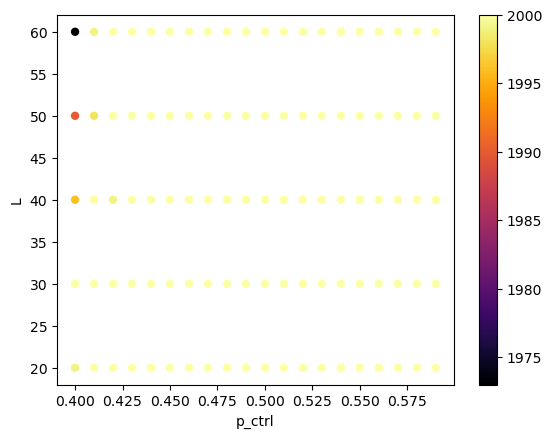

In [56]:
visualize_dataset(df_MPS_0_DW,params={'Metrics':'DW1','T':0,'p_proj':0},xlabel='p_ctrl',ylabel='L')

# Plot

### $\mathbb{E}_m[\langle{\hat{F}}\rangle]$

(0.0, 0.8)

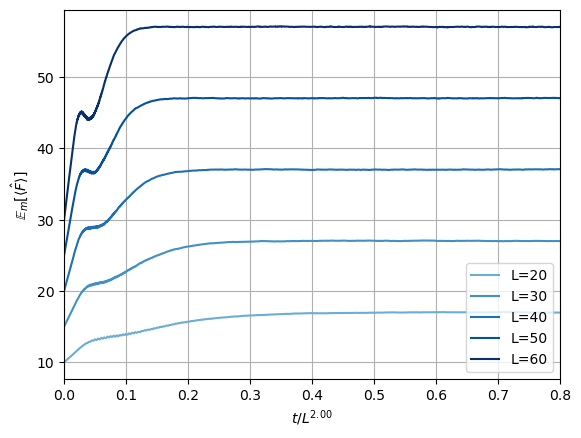

In [82]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
p_ctrl=0.4
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))
for idx,L in enumerate(L_list):
    data=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

ax.set_xlim(0,.8)


Text(0.5, 0, '$t/L^{2.00}$')

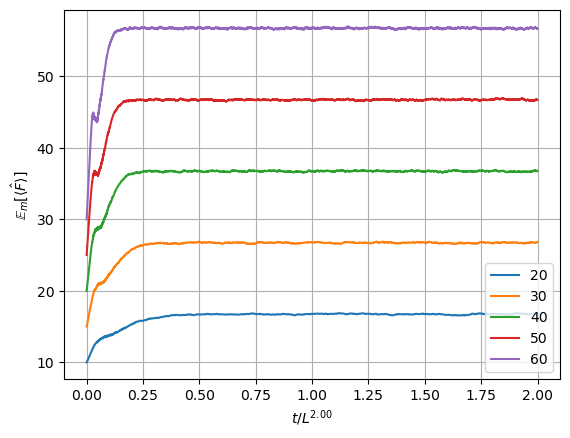

In [27]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.41).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

Text(0.5, 0, '$t/L^{2.00}$')

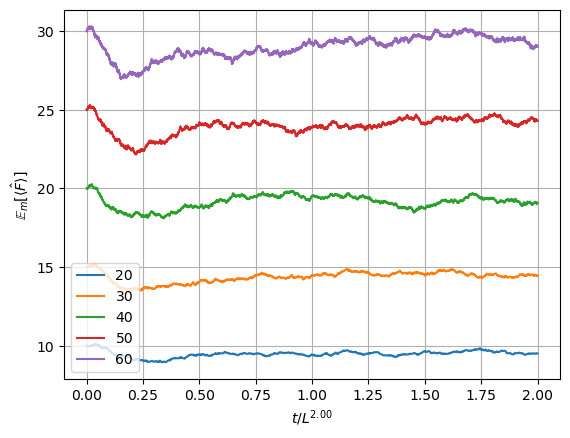

In [28]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

In [ ]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data.index
    y=data.apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle]$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

### $\mathbb{E}_m[\langle{\hat{F}}\rangle^2]- \mathbb{E}_m[\langle{\hat{F}}\rangle]^2$

(0.0, 100.0)

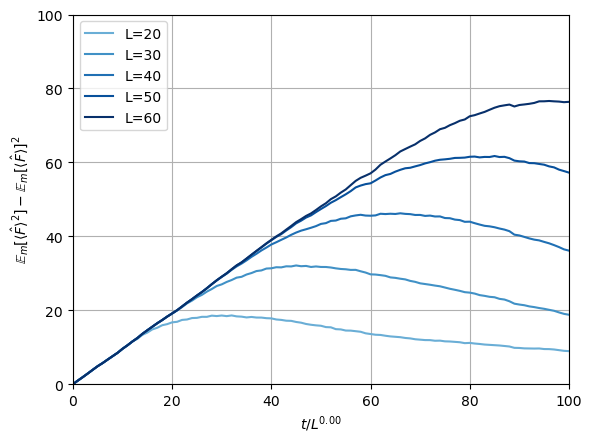

In [80]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=0
p_ctrl=0.59
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))
for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    # data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    sq_mean=data1.apply(lambda x : np.array(x)**2).apply(np.mean)
    mean_sq=data1.apply(np.mean).apply(lambda x : np.array(x)**2)
    y=sq_mean-mean_sq
    ax.plot((t_list/L**z),y,label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle^2]- \mathbb{E}_m[\langle{\hat{F}}\rangle]^2$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

ax.set_xlim(0,100)
ax.set_ylim(0,100)

Text(0.5, 0, '$\\sqrt{t/L^{2.00}}$')

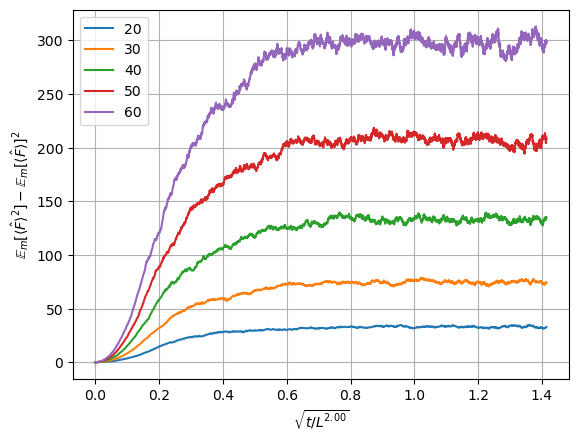

In [26]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    # data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    sq_mean=data1.apply(lambda x : np.array(x)**2).apply(np.mean)
    mean_sq=data1.apply(np.mean).apply(lambda x : np.array(x)**2)
    y=sq_mean-mean_sq
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle{\hat{F}}\rangle^2]- \mathbb{E}_m[\langle{\hat{F}}\rangle]^2$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z:.2f}}}}}$')

### $\mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle]$ = $\mathbb{E}_m[\langle\hat{F}^2\rangle_m-\langle\hat{F}\rangle_m^2]$

Text(0.5, 0, '$t$')

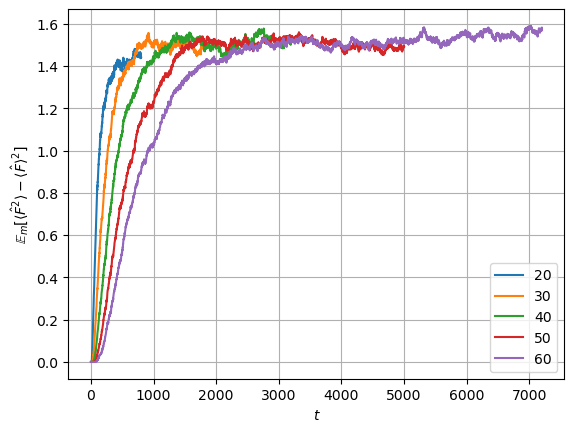

In [59]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=0
for L in L_list:
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='L',key=L).xs(level='p_proj',key=0.00).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='L',key=L).xs(level='p_proj',key=0.00).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$t$')

Text(0.5, 0, '$\\sqrt{t}$')

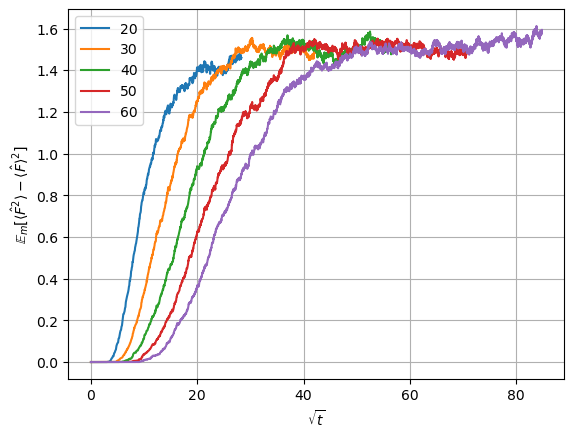

In [28]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=0
for L in L_list:
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}$')

(0.0, 4.0)

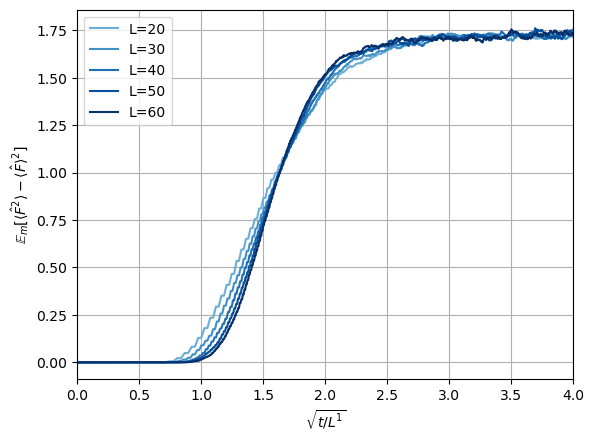

In [28]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=1
p_ctrl=0.4
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))
# y={}
for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    # y[L]=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y[L],label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{z}}}$')

# ax.set_xlim(0,.8)
ax.set_xlim(0,4)

Text(0.5, 0, '$\\sqrt{t/L^{2}}$')

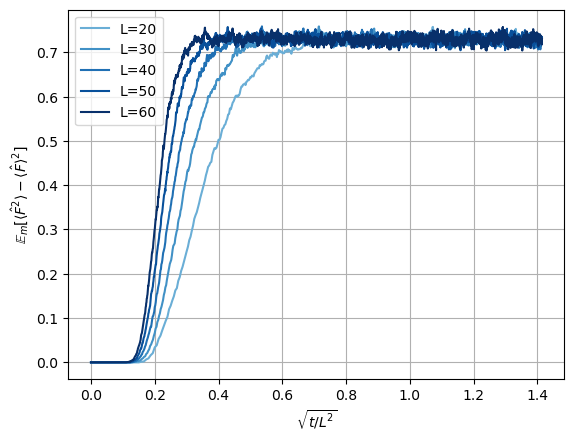

In [43]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
p_ctrl=0.5
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))
# y={}
for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    # y[L]=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y[L],label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{{{z}}}}}$')

# ax.set_xlim(0,.8)
# ax.set_xlim(0,4)

(0.0, 4.0)

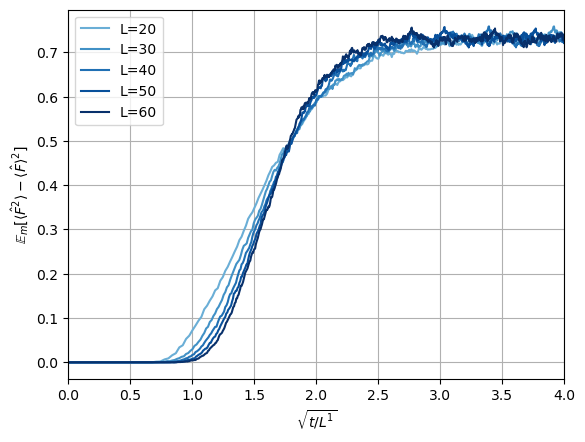

In [49]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=1
p_ctrl=0.59
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))
# y={}
for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    # y[L]=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y[L],label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel(f'$\sqrt{{t/L^{z}}}$')

# ax.set_xlim(0,.8)
ax.set_xlim(0,4)

In [89]:
((0.3)*60)**2-((0.2)*60)**2

180.0

(0.0, 0.8)

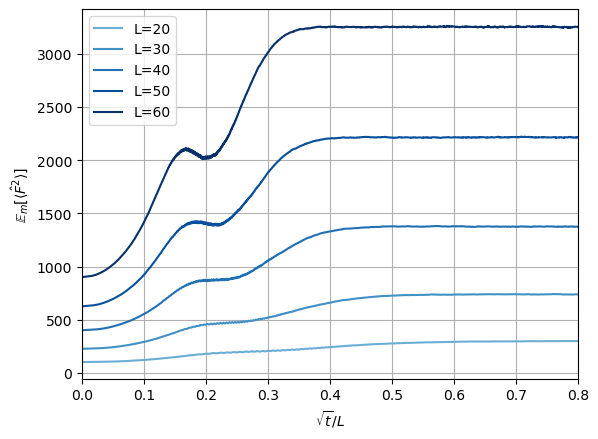

In [78]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
p_ctrl=0.4
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))

for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}/L$')

ax.set_xlim(0,.8)


(0.0, 0.8)

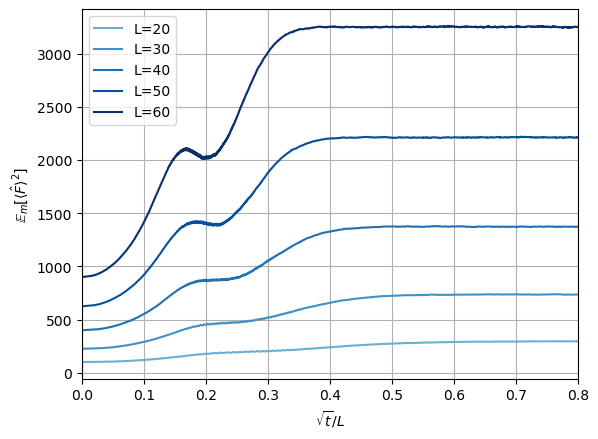

In [79]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
p_ctrl=0.4
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))

for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}/L$')

ax.set_xlim(0,.8)


(0.0, 0.8)

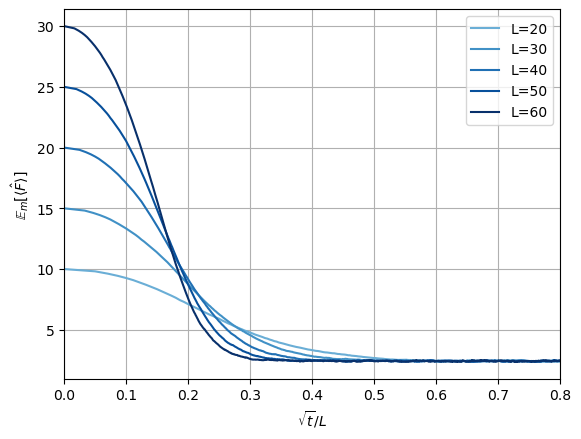

In [86]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
p_ctrl=0.59
color_list=(plt.cm.Blues(np.linspace(0.5,1,len(L_list))))

for idx,L in enumerate(L_list):
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data1).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=f'L={L}',color=(color_list[idx]))
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}\rangle]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}/L$')

ax.set_xlim(0,.8)


Text(0.5, 0, '$\\sqrt{t}/L$')

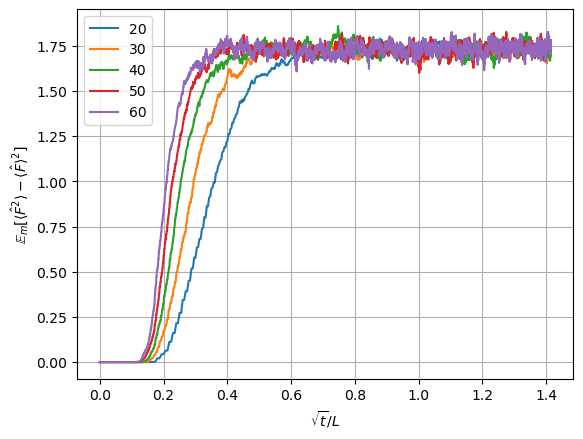

In [30]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.40).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.40).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}/L$')

Text(0.5, 0, '${t}/L$')

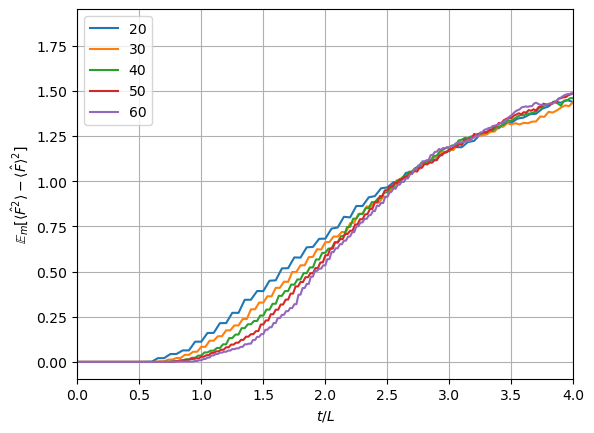

In [33]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=1
for L in L_list:
    data1=df_MPS_0_DW.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.40).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_DW.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.40).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2)).apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('${t}/L$')

In [20]:
L=20
data1=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
data2=df_MPS_0_T.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
y=(data2-data1.apply(lambda x : np.array(x)**2))

In [ ]:
plt.hist(y.iloc[-10][:2000],density=True,bins=20)

(array([3.58948901e-01, 4.62973449e-01, 5.27186132e-01, 4.27656473e-01,
        3.50280189e-01, 2.88636013e-01, 1.99380383e-01, 1.55394694e-01,
        1.13656450e-01, 9.08609473e-02, 6.35705568e-02, 4.84805761e-02,
        3.37116589e-02, 2.15112490e-02, 1.89427417e-02, 1.31636001e-02,
        9.31083912e-03, 7.38445861e-03, 4.49488785e-03, 3.21063418e-03,
        3.53169760e-03, 1.92638051e-03, 2.24744393e-03, 1.60531709e-03,
        6.42126836e-04, 6.42126836e-04, 6.42126836e-04, 3.21063418e-04,
        0.00000000e+00, 3.21063418e-04]),
 array([5.97183574e-37, 3.11464946e-01, 6.22929891e-01, 9.34394837e-01,
        1.24585978e+00, 1.55732473e+00, 1.86878967e+00, 2.18025462e+00,
        2.49171956e+00, 2.80318451e+00, 3.11464946e+00, 3.42611440e+00,
        3.73757935e+00, 4.04904429e+00, 4.36050924e+00, 4.67197418e+00,
        4.98343913e+00, 5.29490407e+00, 5.60636902e+00, 5.91783397e+00,
        6.22929891e+00, 6.54076386e+00, 6.85222880e+00, 7.16369375e+00,
        7.47515869e+00

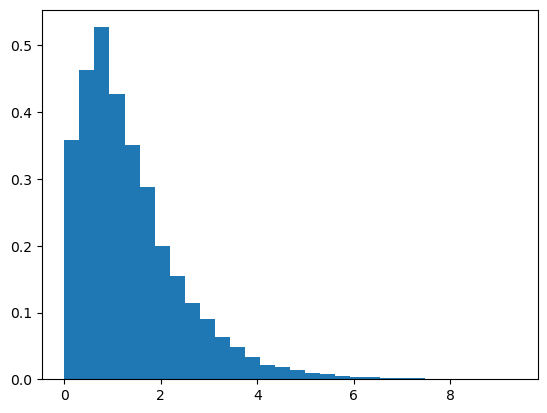

In [46]:
plt.hist(y.iloc[-10],density=True,bins=30)

In [ ]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_T.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2))
    
    ax.plot(np.sqrt(t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2]$')
# ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')
ax.set_xlabel('$\sqrt{t}/L$')

### $\mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle^2]$ = $\mathbb{E}_m[(\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2)^2]$

Text(0.5, 0, '$t/L^{2.00}$')

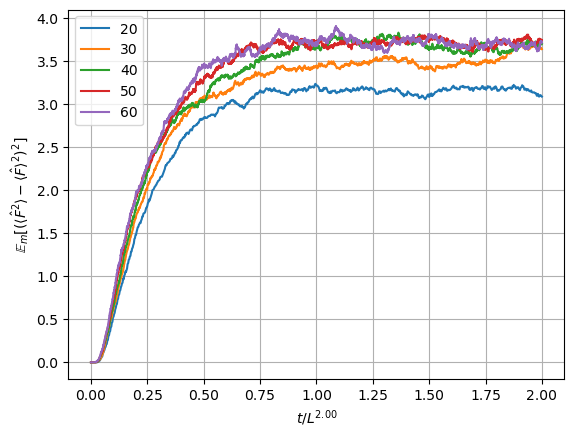

In [26]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_T.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2)).apply(lambda x : np.array(x)**2).apply(np.mean)
    ax.plot((t_list/L**z),y,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[(\langle\hat{F}^2\rangle-\langle\hat{F}\rangle^2)^2]$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

### $\mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle^2] - \mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle]^2$

Text(0.5, 0, '$t/L^{2.00}$')

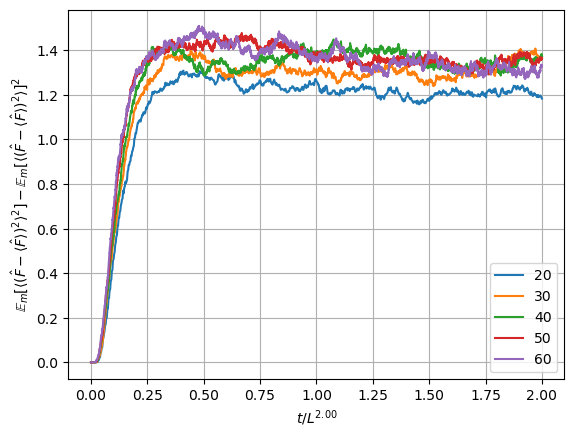

In [27]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_T.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2))
    y_sq_mean=y.apply(lambda x : np.array(x)**2).apply(np.mean)
    y_mean_sq=y.apply(np.mean).apply(lambda x : np.array(x)**2)
    ax.plot((t_list/L**z),y_sq_mean-y_mean_sq,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim(0,80/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle^2] - \mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle]^2$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

Text(0.5, 0, '$t/L^{2.00}$')

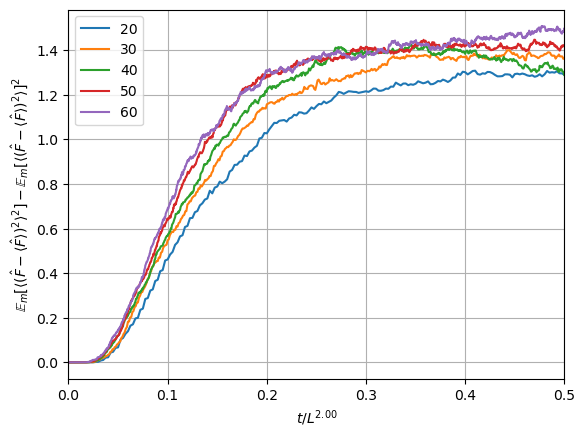

In [29]:
L_list=np.arange(20,61,10)
# L_list=[20,30,40,50]
fig,ax=plt.subplots()
z=2
for L in L_list:
    data1=df_MPS_0_T.xs(level='Metrics',key='DW1').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    data2=df_MPS_0_T.xs(level='Metrics',key='DW2').xs(level='p_ctrl',key=0.50).xs(level='p_proj',key=0.00).xs(level='L',key=L).sort_index()['observations']
    t_list=data1.index
    y=(data2-data1.apply(lambda x : np.array(x)**2))
    y_sq_mean=y.apply(lambda x : np.array(x)**2).apply(np.mean)
    y_mean_sq=y.apply(np.mean).apply(lambda x : np.array(x)**2)
    ax.plot((t_list/L**z),y_sq_mean-y_mean_sq,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim(0,200/L_list[0]**z)
ax.set_ylabel(r'$\mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle^2] - \mathbb{E}_m[\langle(\hat{F}-\langle\hat{F}\rangle)^2\rangle]^2$')
ax.set_xlabel(f'$t/L^{{{z:.2f}}}$')

## Fix json


In [10]:
import json

In [11]:
from tqdm import tqdm

In [12]:
def split_DW(fn):
    data=load_json(fn)
    if 'DW' in data:
        data['DW1']=data['DW'][0]
        data['DW2']=data['DW'][1]
        del data['DW']
        with open(fn, 'w') as json_file:
            json.dump(data,json_file)
    else:
        pass
        # print(f'{fn} does not have DW field' )

In [196]:
def rename(fn):
    if not '_pctrl' in fn:
        os.rename(fn,fn.replace('_p','_pctrl').replace('_s','_pproj0.000_s'))
    else:
        print('No need to rename')

In [13]:
def fix_args(fn):
    data=load_json(fn)
    if 'p' in data['args']:
        data['args']['p_ctrl']=data['args']['p']
        data['args']['p_proj']=0
        del data['args']['p']
        with open(fn, 'w') as json_file:
            json.dump(data,json_file)
    else:
        pass
        # print(f'{fn} does not have DW field' )

In [198]:
rename('Data/Metrics/MPS_0-1_DW/'+'MPS_(0,1)_L20_pctrl0.500_pproj0.000_s0_DW.json')

No need to rename


In [52]:
all_fn=os.listdir('Data/Metrics/MPS_0-1_DW')

In [18]:
zz=load_json('Data/Metrics/MPS_0-1_DW/'+all_fn[0])

In [19]:
zz['args']

{'seed': 0, 'L': 20, 'p': 0.5}

In [14]:
len(all_fn)

50002

In [169]:
for fn in tqdm(all_fn):
    if 'json' in fn:
        split_DW('Data/Metrics/MPS_0-1_DW/'+fn)

100%|██████████| 50003/50003 [1:17:37<00:00, 10.74it/s]


In [200]:
for fn in tqdm(all_fn):
    if 'json' in fn:
        rename('Data/Metrics/MPS_0-1_DW/'+fn)

 20%|██        | 10042/50002 [00:32<02:10, 306.97it/s]

No need to rename


100%|██████████| 50002/50002 [02:24<00:00, 346.24it/s]


In [16]:
for fn in tqdm(all_fn):
    if 'json' in fn:
        fix_args('Data/Metrics/MPS_0-1_DW/'+fn)

100%|██████████| 50003/50003 [1:31:37<00:00,  9.10it/s]


In [46]:
zz=load_json('Data/Metrics/MPS_0-1_DW/MPS_(0,1)_L20_p0.500_s20_DW.json')

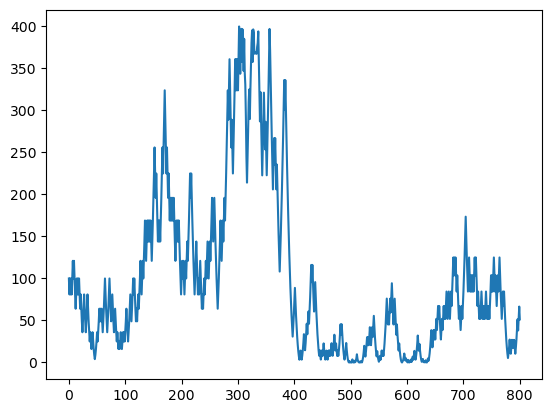

In [49]:
plt.plot(zz[
    'DW2'
])

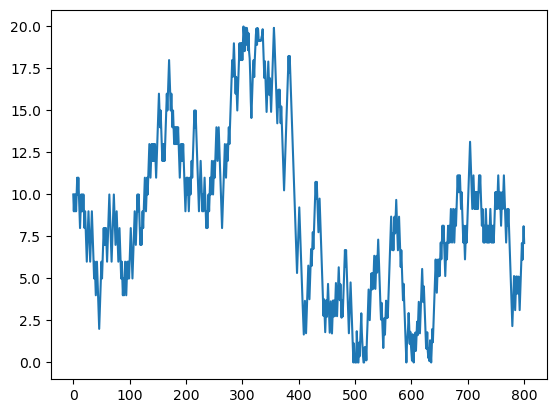

In [34]:
plt.plot(data['DW1'])

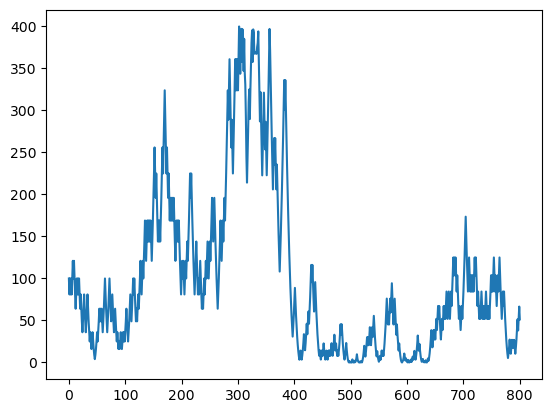

In [35]:
plt.plot(data['DW2'])

In [ ]:
with open('MPS_(0,1)_L20_p0.500_s20_DW.json','rb') as f:
    